In [ ]:
!pip install statsmodels
!pip install regex
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import regex as re 
from datetime import datetime 
import scipy as sp
import statsmodels.api as sm
df = pd.read_csv('com_prices.csv')
df.head()

In [ ]:
#use regex to tranform month column to month/year format


def monthyear(column):
    return re.sub(r'(\d{4})M(\d{2})', r'\2/\1', column)

df['MONTH'] = df['MONTH'].apply(monthyear)
df['MONTH'] = pd.to_datetime(df['MONTH'], format = '%m/%Y')
df.head()

In [ ]:
df.info()

In [ ]:
def to_float(df):
    for i in list(df.columns):
        if i != 'MONTH':
            df[i] = df[i].replace('...', np.nan)
            df[i] = pd.to_numeric(df[i], errors='coerce')
            df[i].fillna(0.0, inplace=True)
        return df

df = to_float(df)
df.head()

In [67]:
categorical_var = [i for i in list(df.select_dtypes(include = object))]
df[categorical_var] = to_float(df[categorical_var])
df

/tmp/ipykernel_1556/1648915703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].replace('...', np.nan)
/tmp/ipykernel_1556/1648915703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = pd.to_numeric(df[i], errors='coerce')
/tmp/ipykernel_1556/1648915703.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960-01-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,0.000000,...,511.471832,11.42,715.40,206.10,2180.40,1631.00,260.80,35.27,83.50,0.9137
1,1960-02-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,0.000000,...,511.471832,11.42,728.19,203.70,2180.40,1631.00,244.90,35.27,83.50,0.9137
2,1960-03-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,0.000000,...,511.471832,11.42,684.94,210.30,2173.80,1631.00,248.70,35.27,83.50,0.9137
3,1960-04-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,0.000000,...,511.471832,11.42,723.11,213.60,2178.20,1631.00,254.60,35.27,83.50,0.9137
4,1960-05-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,0.000000,...,511.471832,11.42,684.75,213.40,2162.70,1631.00,253.80,35.27,83.50,0.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2023-01-01,80.410000,83.09,80.03,78.11,317.99,172.0000,3.2728,20.183971,20.194788,...,2501.820000,122.23,9037.95,2201.26,28154.14,28194.61,3309.81,1897.71,1053.25,23.6530
757,2023-02-01,80.253333,82.71,81.21,76.84,207.48,144.6700,2.3836,16.537137,18.415330,...,2416.180000,127.60,8936.59,2093.06,26862.90,26727.95,3133.84,1854.54,958.85,21.9210
758,2023-03-01,76.473333,78.53,77.52,73.37,187.23,136.8400,2.3049,13.812077,16.033126,...,2296.420000,128.37,8856.31,2115.18,23999.96,23288.61,2967.46,1912.73,970.61,21.9760
759,2023-04-01,82.460000,84.11,83.83,79.44,194.28,133.7451,2.1611,13.520530,14.366063,...,2343.230000,117.39,8809.42,2149.43,25793.75,23894.56,2767.56,1999.77,1050.74,25.0100


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MONTH          761 non-null    datetime64[ns]
 1   CRUDE_PETRO    761 non-null    float64       
 2   CRUDE_BRENT    761 non-null    float64       
 3   CRUDE_DUBAI    761 non-null    float64       
 4   CRUDE_WTI      761 non-null    float64       
 5   COAL_AUS       761 non-null    float64       
 6   COAL_SAFRICA   761 non-null    float64       
 7   NGAS_US        761 non-null    float64       
 8   NGAS_EUR       761 non-null    float64       
 9   NGAS_JP        761 non-null    float64       
 10  iNATGAS        761 non-null    float64       
 11  COCOA          761 non-null    float64       
 12  COFFEE_ARABIC  761 non-null    float64       
 13  COFFEE_ROBUS   761 non-null    float64       
 14  TEA_AVG        761 non-null    float64       
 15  TEA_COLOMBO    761 non-

In [69]:
df.to_csv('comsdata.csv')

In [70]:
df = pd.read_csv('comsdata.csv')
df

,Unnamed: 0,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,0,1960-01-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,...,511.471832,11.42,715.40,206.10,2180.40,1631.00,260.80,35.27,83.50,0.9137
1,1,1960-02-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,...,511.471832,11.42,728.19,203.70,2180.40,1631.00,244.90,35.27,83.50,0.9137
2,2,1960-03-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,...,511.471832,11.42,684.94,210.30,2173.80,1631.00,248.70,35.27,83.50,0.9137
3,3,1960-04-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,...,511.471832,11.42,723.11,213.60,2178.20,1631.00,254.60,35.27,83.50,0.9137
4,4,1960-05-01,1.630000,1.63,1.63,0.00,0.00,0.0000,0.1400,0.404774,...,511.471832,11.42,684.75,213.40,2162.70,1631.00,253.80,35.27,83.50,0.9137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,756,2023-01-01,80.410000,83.09,80.03,78.11,317.99,172.0000,3.2728,20.183971,...,2501.820000,122.23,9037.95,2201.26,28154.14,28194.61,3309.81,1897.71,1053.25,23.6530
757,757,2023-02-01,80.253333,82.71,81.21,76.84,207.48,144.6700,2.3836,16.537137,...,2416.180000,127.60,8936.59,2093.06,26862.90,26727.95,3133.84,1854.54,958.85,21.9210
758,758,2023-03-01,76.473333,78.53,77.52,73.37,187.23,136.8400,2.3049,13.812077,...,2296.420000,128.37,8856.31,2115.18,23999.96,23288.61,2967.46,1912.73,970.61,21.9760
759,759,2023-04-01,82.460000,84.11,83.83,79.44,194.28,133.7451,2.1611,13.520530,...,2343.230000,117.39,8809.42,2149.43,25793.75,23894.56,2767.56,1999.77,1050.74,25.0100


Sicne there are a lot of different commodities lets try to reduce the feature space
Average all the commodities like energy and coffee prices into a single column 


<Axes: xlabel='MONTH', ylabel='GOLD'>

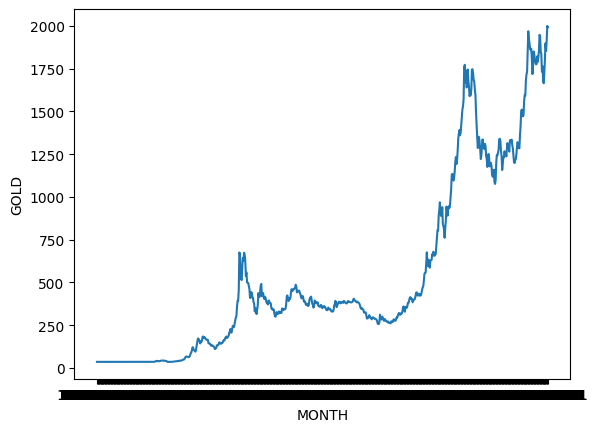

In [71]:
sns.lineplot(data = df, x = 'MONTH', y = 'GOLD')

<Axes: xlabel='MONTH', ylabel='GOLD'>

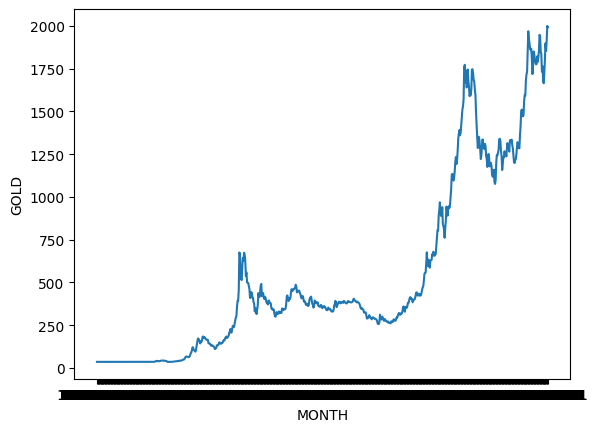

In [72]:
sns.lineplot(data = df[df['MONTH'] > '01-01-2002'], x = 'MONTH', y = 'GOLD') 

In [73]:
df.columns

Index(['Unnamed: 0', 'MONTH', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI',
       'CRUDE_WTI', 'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR',
       'NGAS_JP', 'iNATGAS', 'COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS',
       'TEA_AVG', 'TEA_COLOMBO', 'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL',
       'GRNUT', 'FISH_MEAL', 'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL',
       'SOYBEANS', 'SOYBEAN_OIL', 'SOYBEAN_MEAL', 'RAPESEED_OIL',
       'SUNFLOWER_OIL', 'BARLEY', 'MAIZE', 'SORGHUM', 'RICE_05', 'RICE_25',
       'RICE_A1', 'RICE_05_VNM', 'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU',
       'BANANA_US', 'ORANGE', 'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX',
       'SUGAR_EU', 'SUGAR_US', 'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS',
       'SAWNWD_CMR', 'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],

In [74]:
energy = ['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COFFEE_ARABIC']

caffeine = ['COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'TOBAC_US']

oils = ['COCONUT_OIL', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL','SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL']

grains = ['COCOA', 'GRNUT', 'SOYBEANS','BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW' ]

food = ['BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD']

industrial = ['LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG']

metals = ['PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'] 



In [75]:
ecorr = df[energy].corr()
ccorr = df[caffeine].corr()
ocorr = df[oils].corr()
gcorr = df[grains].corr()
fcorr = df[food].corr()
icorr = df[industrial].corr()
mcorr = df[metals].corr()


<Axes: >

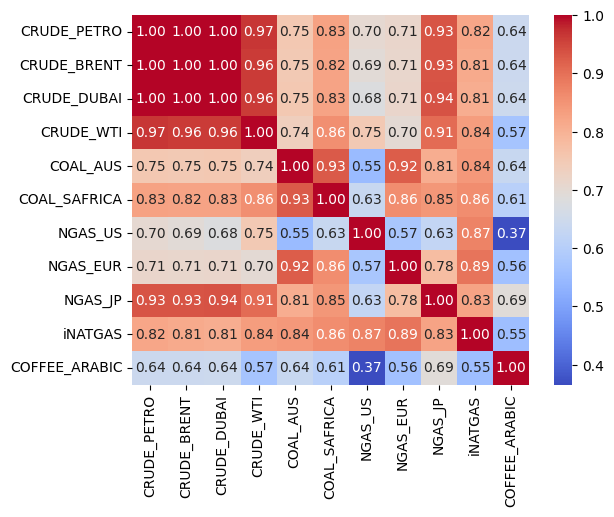

In [76]:
sns.heatmap(ecorr, annot=True, cmap='coolwarm', fmt = '.2f')

In [ ]:
plt.figure(figsize=(10,5))
limited_time = df[df['MONTH'] > '01-01-2022']
#df_sorted_wti = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_WTI')
df_sorted_petro = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_PETRO')
df_sorted_brent = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_BRENT')
df_sorted_dubai = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_DUBAI')
#sns.lineplot(data = df_sorted_wti, x = 'MONTH', y = 'CRUDE_WTI', label = 'WTI') 
sns.lineplot(data = df_sorted_petro, x = 'MONTH', y = 'CRUDE_PETRO', label = 'PETRO')
sns.lineplot(data = df_sorted_brent, x = 'MONTH', y = 'CRUDE_BRENT', label = 'BRENT')
sns.lineplot(data = df_sorted_dubai, x = 'MONTH', y = 'CRUDE_DUBAI', label = 'DUBAI')
plt.show()

In [ ]:
df1 = df.copy()
df1.drop('MONTH', axis = 1, inplace = True)
df1.head()